# Image compression

In this problem, we are going to use k-means to compress images by reducing the number of colors.

The input image is $512 \times 512$ pixel size each of which is described by a $24$-bit color ($8$ bit per RGB channel). If you store the image pixel-wise it will take $512 \times 512 \times 3 = 786432$ bytes.

If we reduce the number of colors, this will reduce the number of bits stored significantly. In order to ensure the quality of the compressed images, we have to figure out what colors to keep the maximum information. Here is where k-means steps in. We will find 16 groups of similar colors and change every 24-bit color to the centroid of the corresponding group.

In [23]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

In [24]:
%matplotlib inline

## Initialization

Loading an image for compression.

In [25]:
input_image_file = "mandrill-large.png"

Number of colors for the output image (i.e. number of clusters).

In [26]:
num_colors = num_clusters = 16

Random seed.


In [27]:
random_seed = 42

## Loading the data

Loading the data as an array of pixels.

In [28]:
input_img = img.imread(input_image_file)

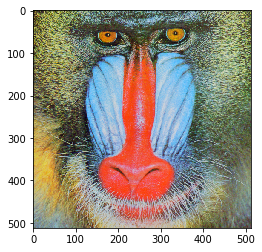

In [29]:
plt.imshow(input_img)
plt.show()

Initializing $m \times n$ training matrix.

In [30]:
color_depth = input_img.shape[-1]

In [31]:
X = input_img.reshape(-1, color_depth)

In [32]:
X.shape

(262144, 3)

## K-Means clustering

In [33]:
np.random.seed(random_seed)

Initialize centroids as colors of random pixels of the picture.

In [34]:
# =============== TODO: Your code here ===============
# Initialize centroids

centroids = X[np.random.randint(0, X.shape[0], num_clusters)]
# ====================================================

In [35]:
centroids

array([[0.3372549 , 0.3019608 , 0.1764706 ],
       [0.29411766, 0.34509805, 0.27450982],
       [0.54509807, 0.77254903, 0.93333334],
       [0.94509804, 0.3647059 , 0.08627451],
       [0.40392157, 0.4117647 , 0.24313726],
       [0.29411766, 0.23921569, 0.11764706],
       [0.7176471 , 0.8       , 0.85490197],
       [0.827451  , 0.6901961 , 0.31764707],
       [0.49411765, 0.59607846, 0.5803922 ],
       [0.20784314, 0.3647059 , 0.24313726],
       [0.48235294, 0.45490196, 0.39607844],
       [0.78039217, 0.7490196 , 0.69803923],
       [0.4509804 , 0.68235296, 0.9098039 ],
       [0.6156863 , 0.68235296, 0.69411767],
       [0.654902  , 0.7058824 , 0.6784314 ],
       [0.41568628, 0.7058824 , 0.84705883]], dtype=float32)

Initizlizing a variable for storing closest centroids for every pixel.

In [36]:
closest_centroids = np.zeros(len(X))

Find the closest centroid for every data point.

In [37]:
def get_closest_centroids(X, centroids):
    # =============== TODO: Your code here ===============
    # Find the index of the closest centroid for each data point. The function should return np.araay.
    deltas = X[:, np.newaxis, :] - centroids
    distances = np.sqrt(np.sum((deltas) ** 2, 2))
    return distances.argmin(1)
    # ====================================================

Move centroids to the mean of all assigned points.

In [38]:
def move_centroids(X, closest_centroids, num_clusters):
    # =============== TODO: Your code here ===============
    # Recompute the coordinates of each centroid. The function should return np.araay.
    l = [X[closest_centroids == n, :].mean(axis=0) for n in range(num_clusters)]
        
    return np.array(l)
    # ====================================================

Compute k-means cost function.

In [39]:
def kmeans_objective(X, centroids, closest_centroids):
    # =============== TODO: Your code here ===============
    # Compute the K-Means objective function.
#     for i in range(len(centroids)):
#         d = X[closest_centroids == i] - centroids[i]
        
#         print(d.shape)
#         print(np.linalg.norm(d))
#         k
        
    return np.sum([np.square(X[closest_centroids == i] - centroids[i]).sum() for i in range(len(centroids))])
    # ====================================================

Implement k-means iteration until convergence.

In [40]:
objective_history = []
convergence = False
iteration = 0
while not convergence:
    # =============== TODO: Your code here ===============
    # Implement k-means iteration until convergence.    
    closest_centroids = get_closest_centroids(X, centroids)
    new_centroids = move_centroids(X, closest_centroids, num_clusters)
    if np.array_equal(centroids, new_centroids):
        convergence = True
    centroids = new_centroids  
    # ====================================================
    # Compute the objective.
    objective = kmeans_objective(X, centroids, closest_centroids)
    objective_history.append(objective)
    
    # Increase iteration counter
    iteration += 1
    
    print("Iteration: {0:2d}    Objective: {1:.3f}".format(iteration, objective))

Iteration:  1    Objective: 3640.573
Iteration:  2    Objective: 3228.304
Iteration:  3    Objective: 3075.166
Iteration:  4    Objective: 3001.805
Iteration:  5    Objective: 2954.116
Iteration:  6    Objective: 2919.828
Iteration:  7    Objective: 2893.852
Iteration:  8    Objective: 2873.771
Iteration:  9    Objective: 2856.858
Iteration: 10    Objective: 2841.688
Iteration: 11    Objective: 2827.078
Iteration: 12    Objective: 2812.613
Iteration: 13    Objective: 2796.752
Iteration: 14    Objective: 2776.009
Iteration: 15    Objective: 2737.232
Iteration: 16    Objective: 2687.496
Iteration: 17    Objective: 2649.448
Iteration: 18    Objective: 2620.824
Iteration: 19    Objective: 2600.773
Iteration: 20    Objective: 2587.655
Iteration: 21    Objective: 2578.242
Iteration: 22    Objective: 2571.137
Iteration: 23    Objective: 2566.220
Iteration: 24    Objective: 2562.625
Iteration: 25    Objective: 2560.076
Iteration: 26    Objective: 2558.333
Iteration: 27    Objective: 2557.054
I

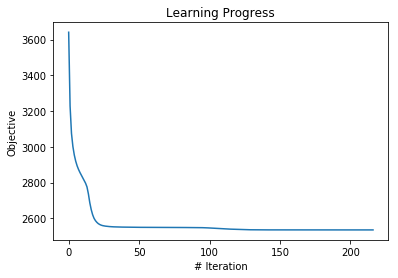

In [41]:
ax = plt.plot(objective_history)[0].axes

ax.set(xlabel="# Iteration")
ax.set(ylabel="Objective")
ax.set(title="Learning Progress")

plt.show()

## Compression results

Represent each point as a closest centroid.

In [42]:
output_img = centroids[closest_centroids].reshape(input_img.shape)

Compare original and compressed images.

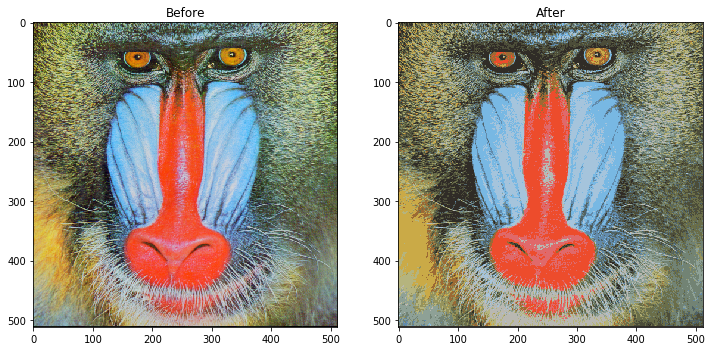

In [43]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(12, 12))

ax_before.imshow(input_img)
ax_after.imshow(output_img)

ax_before.set(title="Before")
ax_after.set(title="After")

plt.show()